<a href="https://colab.research.google.com/github/taolaobd/CS114.L22.KHCL/blob/main/BTAP1MLUPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognizing hand-written digits (Bài đã sửa )
  Bài toán nhận diện chữ số viết tay từ (0-9) thông qua thư viện **scikit-learn**.

Import các thư viện cần thiết.

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

In [ ]:
datasets.load_digits()

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

Load dữ liệu từ datasets. Trong đó:




*   **images** gồm các ma trận có kích thước 8x8 có **giá trị mức xám** cho mỗi ảnh.
*   **target** chính là các giá trị đúng mà mỗi bức ảnh đại diện cho.
*   **target_names** là mảng các giá trị từ 0-9 sẽ được gán tương ứng với mỗi bức ảnh.

Dưới đây là 4 ví dụ:

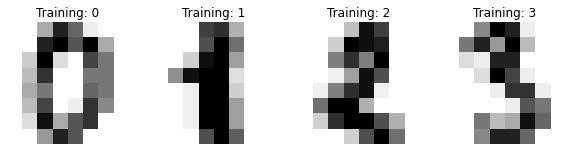

In [ ]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Xem thử 4 ma trận ảnh đầu tiên có dạng và vùng giá trị như thế nào ?

In [ ]:
import numpy as np

In [ ]:
digits.images[:4]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],

       [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
        [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
        [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0

Xét vùng giá trị ma trận !

In [ ]:
Min=0
Max=0

In [ ]:
np.amax(digits.images[0])

15.0

In [ ]:
for i in digits.images:
  if np.amax(i)>Max:
    Max=np.amax(i)
  if np.amin(i)<Min:
    Min=np.amin(i)

In [ ]:
print('Vùng giá trị của ma trận training là ['+str(Min)+'->'+str(Max)+']')

Vùng giá trị của ma trận training là [0->16.0]


Vậy vùng giá trị của các ma trận training là [0->16.0]

Xét số lượng và kích cỡ các ma trận

In [ ]:
digits.images.shape

(1797, 8, 8)

**Nhận xét:**


1.   Các ma trận training có kích cỡ là **8x8** và số lượng các ma trận là **1797**
2.   Vùng giá trị của các ma trận là [0 -> 16]



## Classification

Để áp dụng mô hình phân lớp trên dữ liệu này, chúng ta cần phải flatten (dàn hoặc trải ) bức ảnh, chuyển từ mảng 2 chiều có giá trị mức xám có kích thước (8,8) trở thành 1 vector (64,).

Chúng ta chia bộ dữ liệu thành 2 phần con:


*   Train subset 50%
*   Test subset 50%

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Dưới đây là kết quả của 4 ví dụ đầu:

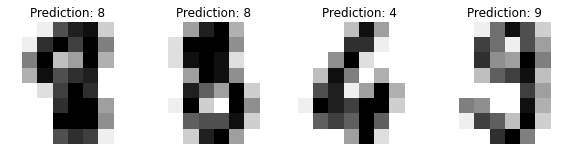

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Show thử 4 tấm đầu tiên xem hiển thị như thế nào?

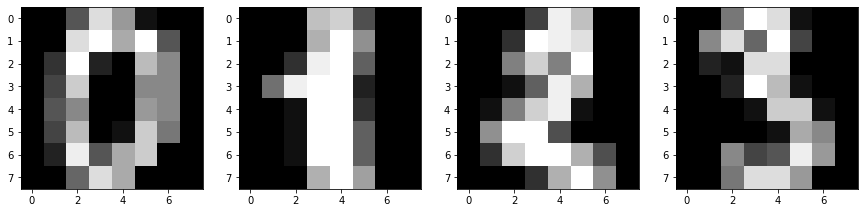

In [ ]:
fig=plt.figure(figsize=(15, 5))
columns = 4
rows = 1
o=1
for i in range(4):
    imagenew=digits.images[i]
    plt.subplot(rows,columns,o)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

**Nhận xét:**  Các bức hình dùng để training có dạng **chữ trắng nền đen** .Không như bản sample đã hiển thị ở trên.

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


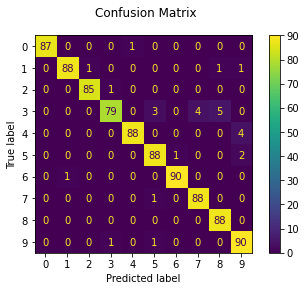

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

###Nhận xét chung về bộ dữ liệu:

1.   Các ma trận training có kích cỡ là **8x8** và số lượng các ma trận là **1797**
2. Vùng giá trị của các ma trận là **[0 -> 16]** 
3.  Các bức hình dùng để training có dạng **chữ trắng nền đen**


## Test cùng camera và giấy ghi số:

In [ ]:
Xlabel=[]

In [ ]:
"""from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename ,quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename"""

In [ ]:
"""from IPython.display import Image
for i in range(39):
  try:
    temp='photo%s.jpg'%i
    filename = take_photo(temp)
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
    #labelx.append(input('Nhập label cho test này: '))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))"""

Để thuận tiện test nhiều lần nhóm đã lưu ảnh trên gg drive.

In [ ]:
cd /content

/content


Sử dụng gdown để lấy dữ liệu từ google drive của nhóm về.

In [ ]:
!gdown --id 1UNKPSKDIC3kLa0yrdVhTX_tNvW0nLO-4

Downloading...
From: https://drive.google.com/uc?id=1UNKPSKDIC3kLa0yrdVhTX_tNvW0nLO-4
To: /content/Testdigit.zip
4.07MB [00:00, 128MB/s]


link google drive: https://drive.google.com/file/d/1UNKPSKDIC3kLa0yrdVhTX_tNvW0nLO-4/view?usp=sharing

Unzip dữ liệu test

In [ ]:
!unzip Testdigit.zip

Archive:  Testdigit.zip
   creating: Testdigit/
  inflating: Testdigit/photo0.jpg    
  inflating: Testdigit/photo1.jpg    
  inflating: Testdigit/photo10.jpg   
  inflating: Testdigit/photo11.jpg   
  inflating: Testdigit/photo12.jpg   
  inflating: Testdigit/photo13.jpg   
  inflating: Testdigit/photo14.jpg   
  inflating: Testdigit/photo15.jpg   
  inflating: Testdigit/photo16.jpg   
  inflating: Testdigit/photo17.jpg   
  inflating: Testdigit/photo18.jpg   
  inflating: Testdigit/photo19.jpg   
  inflating: Testdigit/photo2.jpg    
  inflating: Testdigit/photo20.jpg   
  inflating: Testdigit/photo21.jpg   
  inflating: Testdigit/photo22.jpg   
  inflating: Testdigit/photo23.jpg   
  inflating: Testdigit/photo24.jpg   
  inflating: Testdigit/photo25.jpg   
  inflating: Testdigit/photo26.jpg   
  inflating: Testdigit/photo27.jpg   
  inflating: Testdigit/photo28.jpg   
  inflating: Testdigit/photo29.jpg   
  inflating: Testdigit/photo3.jpg    
  inflating: Testdigit/photo30.jpg   
  

In [ ]:
cd /content/Testdigit

/content/Testdigit


In [ ]:
pwd

'/content/Testdigit'

Import các thư viện phục vụ cho việc xử lý ảnh.

In [ ]:
import cv2
import numpy as np

In [ ]:
from PIL import Image, ImageOps

In [ ]:
Xlabel=[2,4,5,7,8,9,3,6,1,4,0,9,1,7,8,5,4,0,1,2,5,0,1,4,6,2,5,6,7,7,6,2,8,4,5,0,1,9,3]#Gán sẵn label để check đúng sai

Sử dụng cv2 để đọc ảnh đầu vào:

In [ ]:
X_test_temp=[]

In [ ]:
for i in range(39):
  temp='photo%s.jpg' %i  
  img=cv2.imread(temp)
  X_test_temp.append(img)

In [ ]:
X_test_temp[0].shape

(480, 640, 3)

Ảnh ban đầu **(cv2)**:

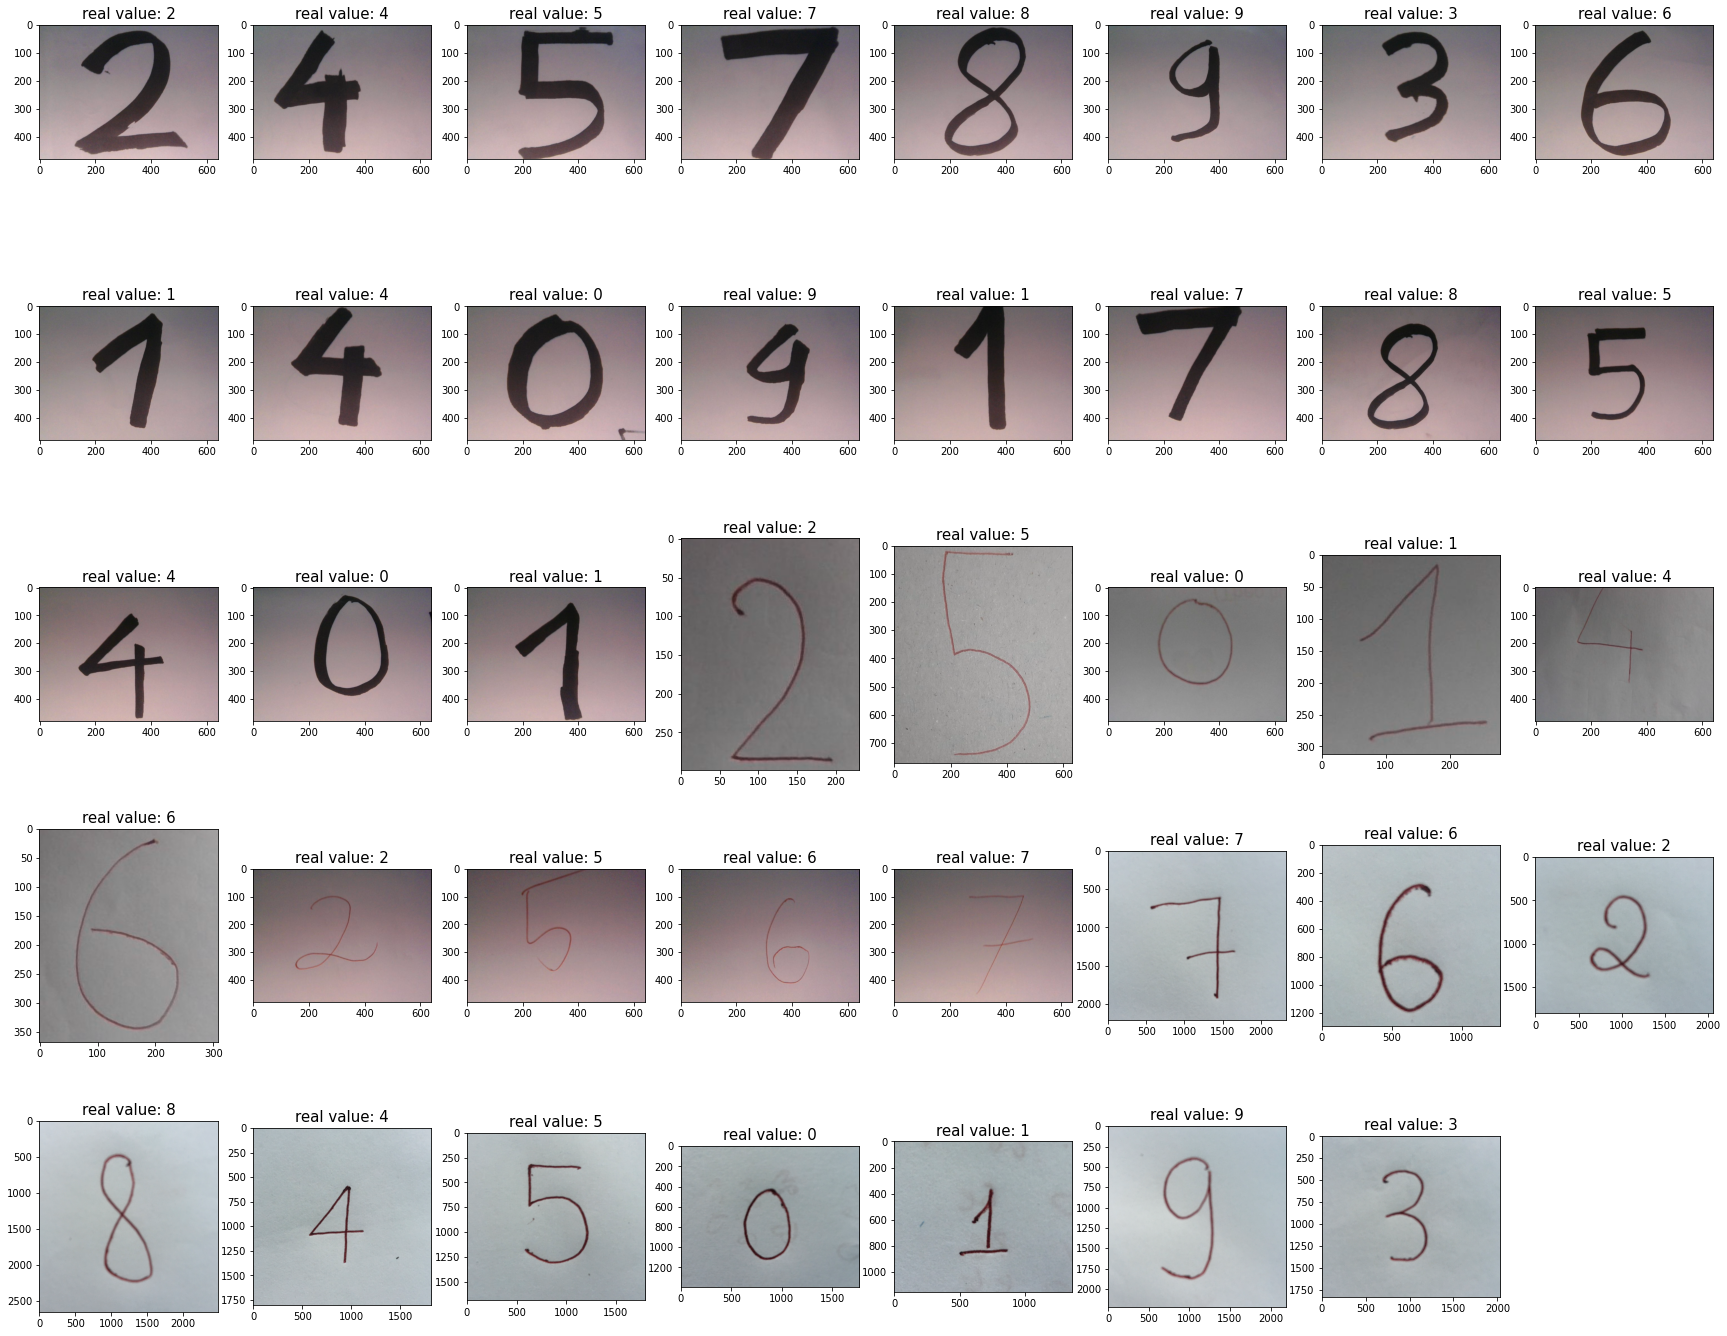

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test_temp[i]
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew)
    o+=1
plt.show()

Sử dụng thư viện PIL để đọc ảnh đầu vào.

In [ ]:
X_test_temp=[]

In [ ]:
for i in range(39):
  temp='photo%s.jpg' %i  
  img=Image.open(temp)
  X_test_temp.append(img)

In [ ]:
len(Xlabel)

39

Ảnh ban đầu **PIL**:

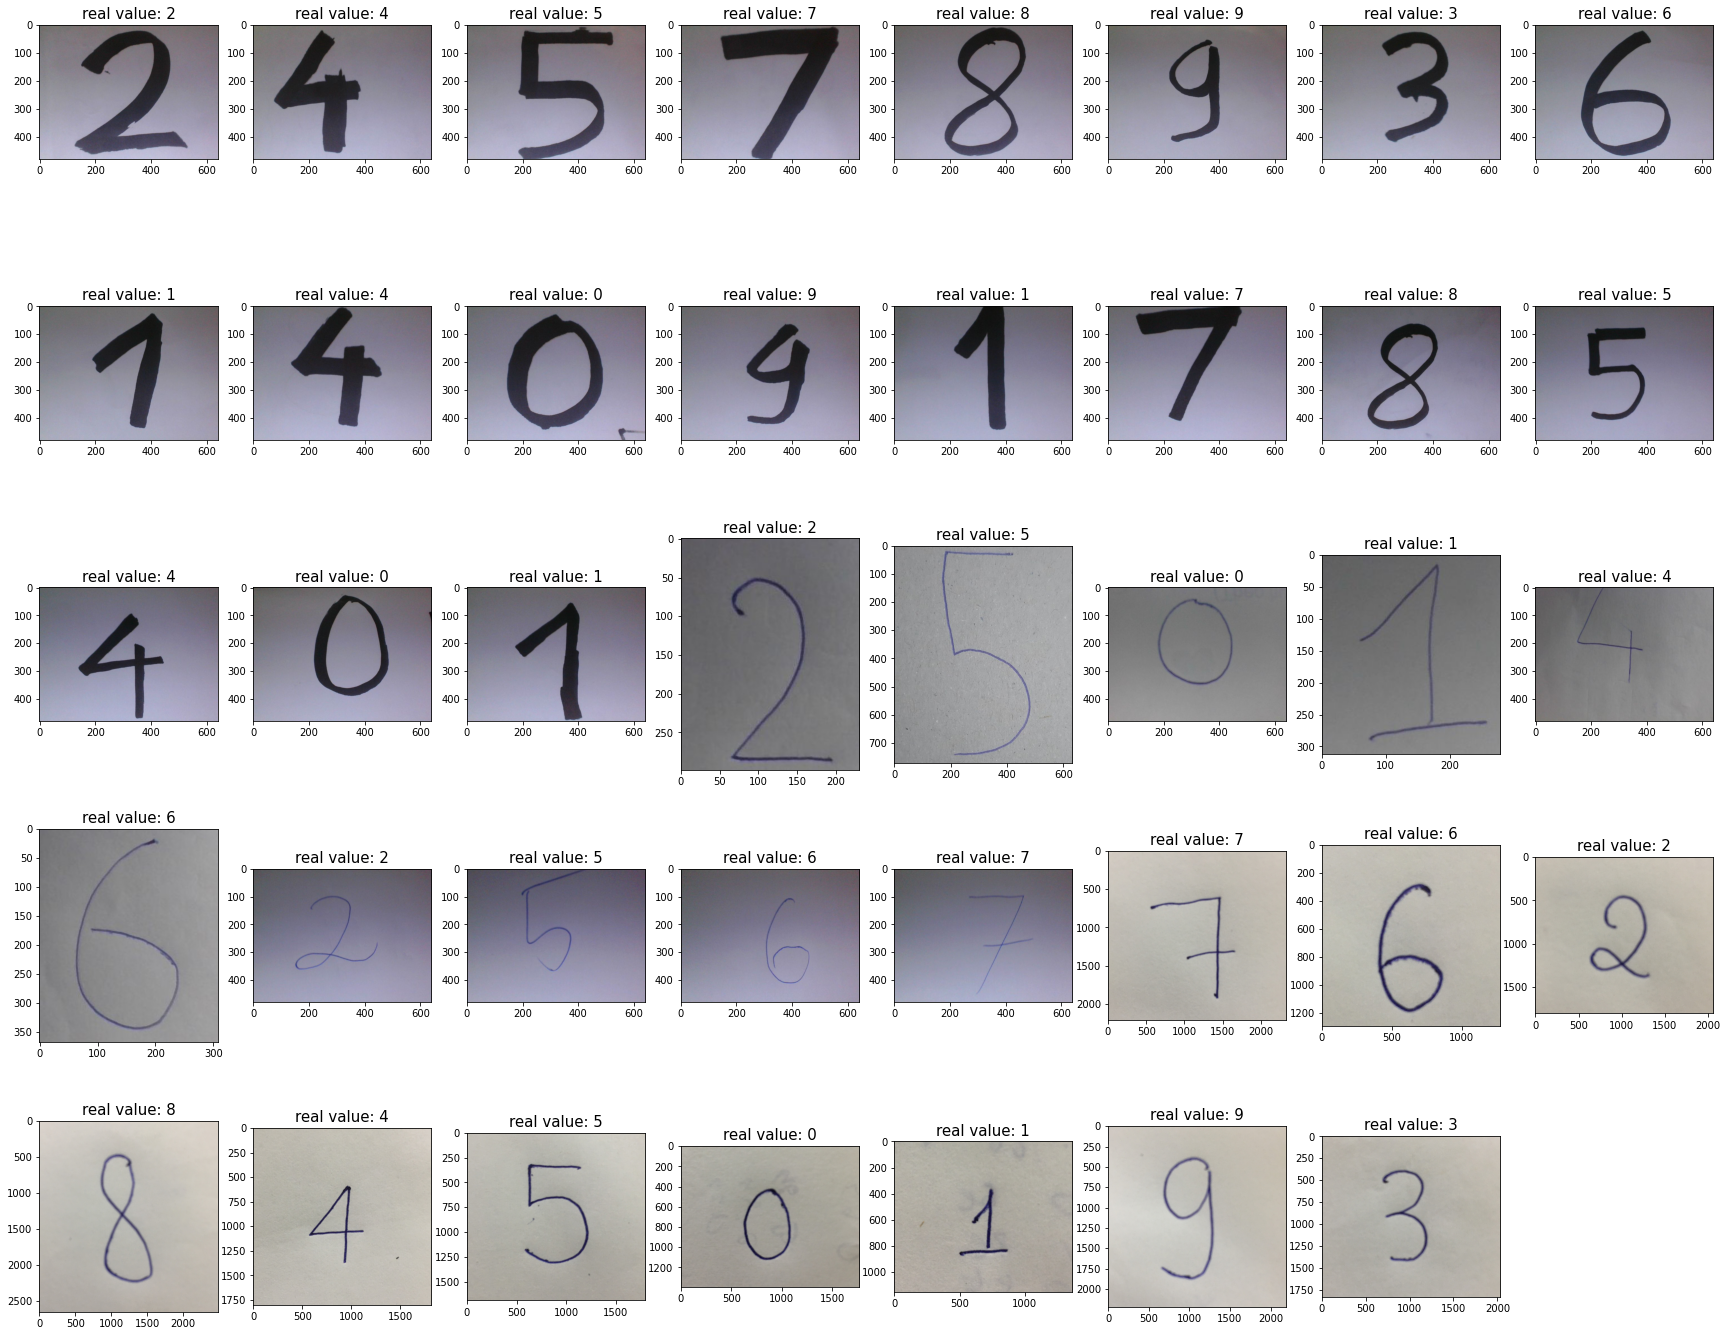

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test_temp[i]
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew)
    o+=1
plt.show()

Nhận xét chung về PIL và CV2:

Khi thử nghiệm với bài nộp đầu tiên, nhóm có đọc ảnh đầu vào từ camera bằng CV2, xong kết quả không cao và ảnh không phù hợp (màu hơi khác so với ảnh gốc). Nên nhóm đã chuyển sang thư viện khác là PIL để đọc và xử lí ảnh đầu vào.

Dưới đây là kết quả so sánh trực quan 2 thư viện

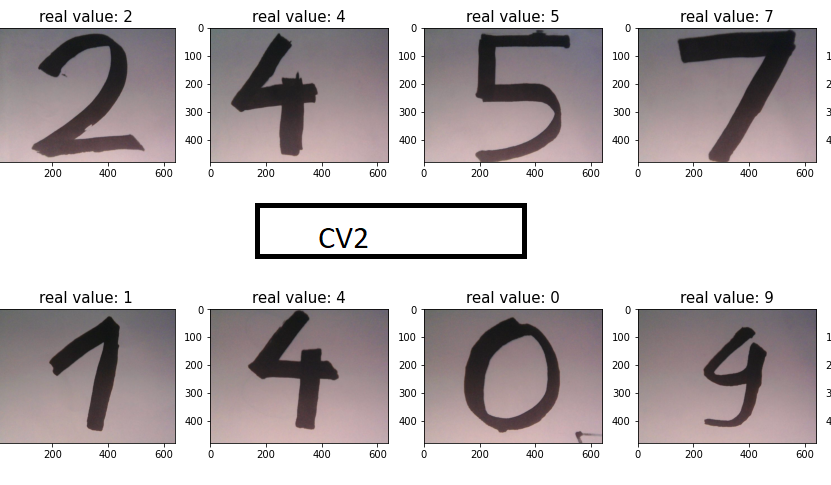

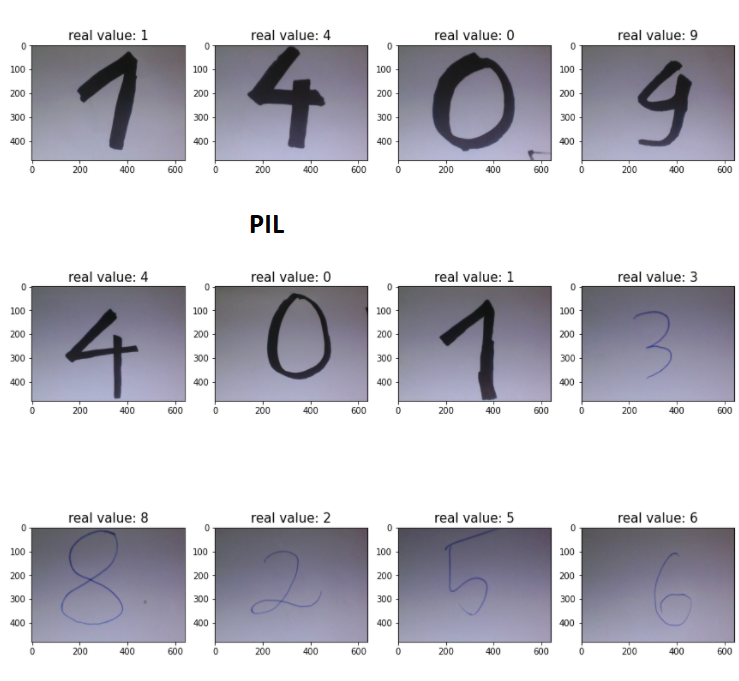

Như kết quả trên thì có thể thấy sử dụng thư viện PIL đem lại ảnh đúng màu và ảnh rõ ràng hơn.

###Tiền xử lí ảnh đầu vào:

Chuyển ảnh sang ảnh xám

In [ ]:
for i in range(39):
  X_test_temp[i]=ImageOps.grayscale(X_test_temp[i])

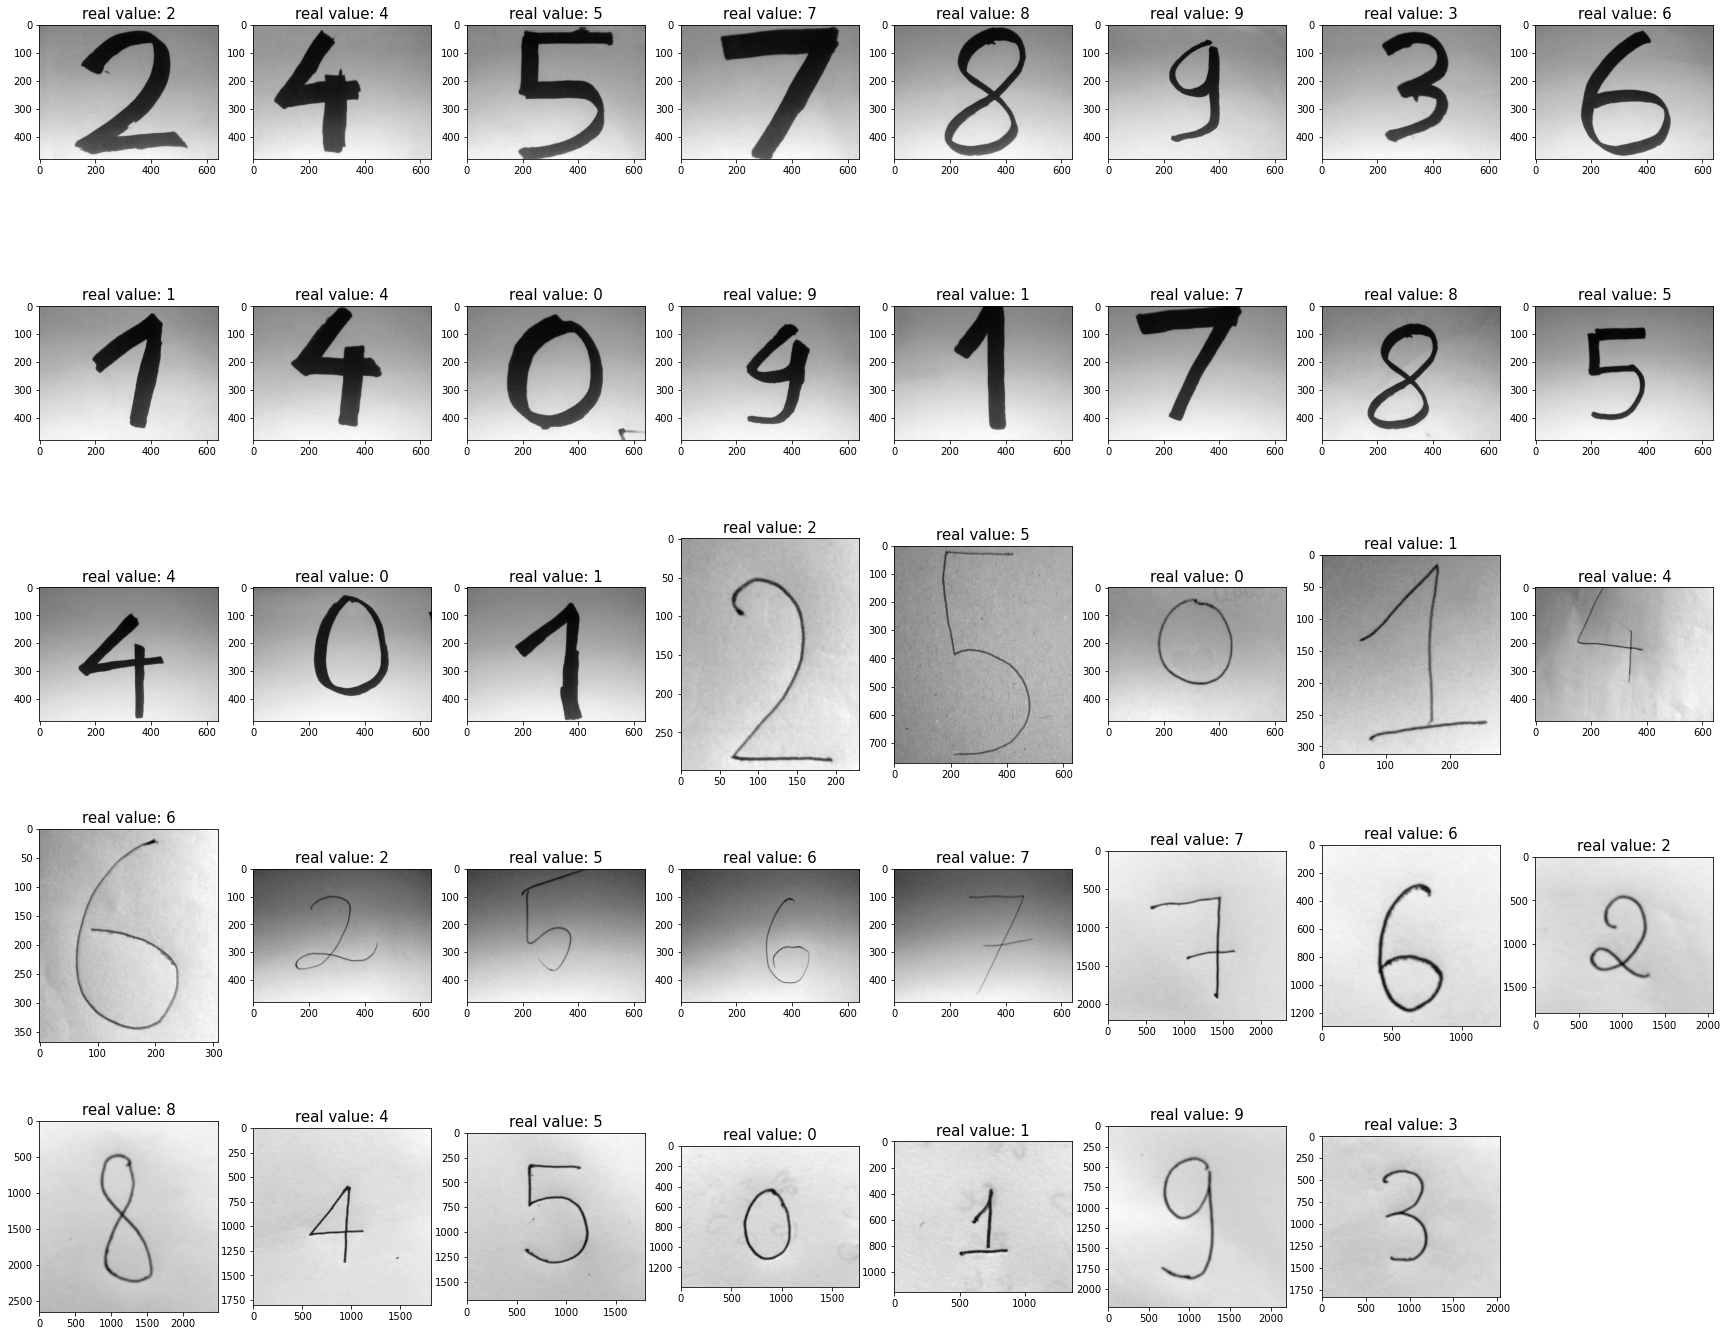

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test_temp[i]
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

Vì ảnh training có dạng là chữ trắng nền đen như đã rút ra từ phần **'Nhận xét chung về bộ dữ liệu'**

Dùng hàm ImageOps.invert() của Pil để chuyển ảnh về dạng chữ trắng nền đen.

In [ ]:
for i in range(39):
  X_test_temp[i] = ImageOps.invert(X_test_temp[i])

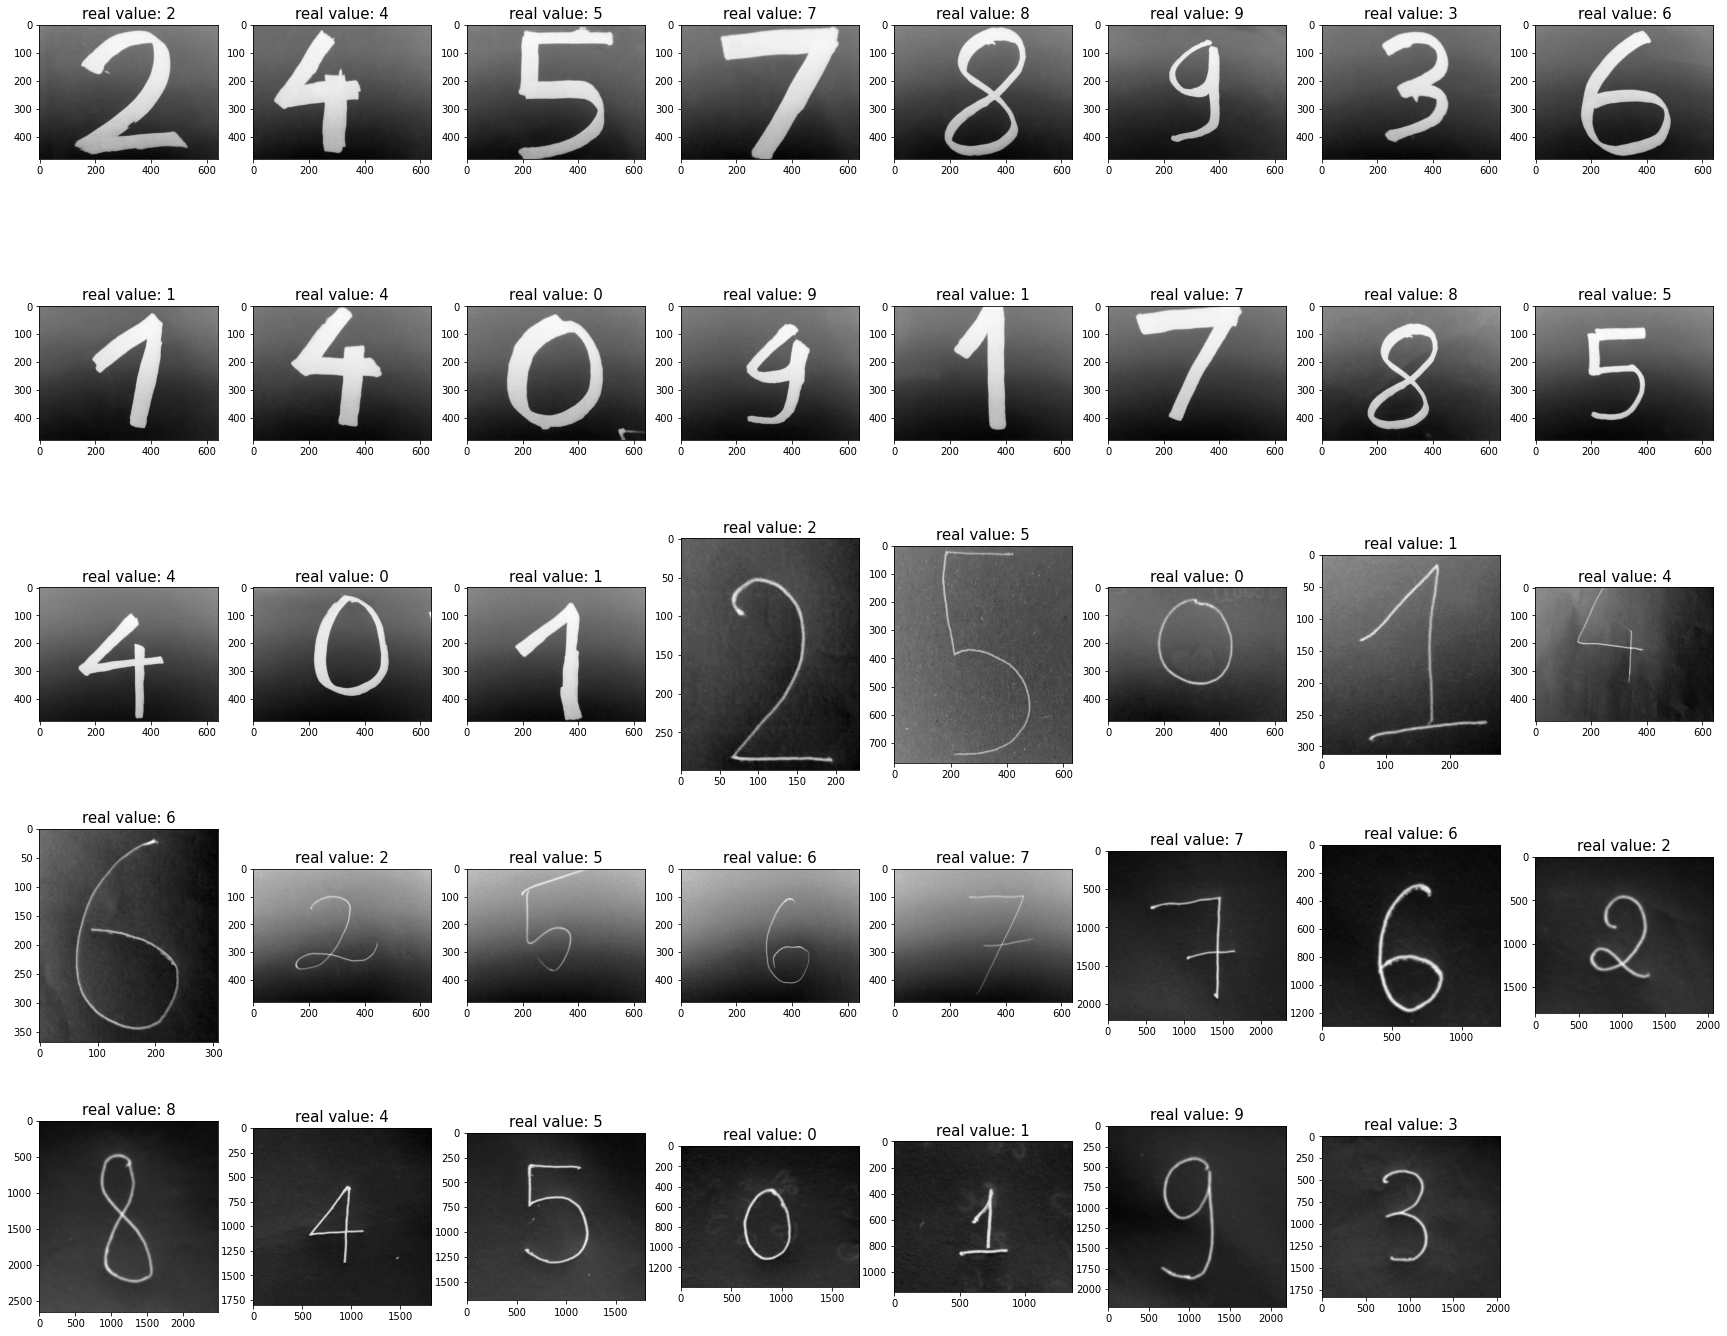

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test_temp[i]
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

Xem thử các ảnh đầu vào hiện tại đang có dạng như thế nào ?

In [ ]:
X_test_temp[:4]

[<PIL.Image.Image image mode=L size=640x480 at 0x7F66164817D0>,
 <PIL.Image.Image image mode=L size=640x480 at 0x7F66164814D0>,
 <PIL.Image.Image image mode=L size=640x480 at 0x7F66164885D0>,
 <PIL.Image.Image image mode=L size=640x480 at 0x7F6622006D90>]

**Nhận xét:** Để có thể thuận tiện cho việc test nên nhóm đã chuyển ảnh về lại CV2 đê resize và xử lí tiếp trước khi đưa vào cho model dự đoán.

Chuyển về cv2:

In [ ]:
for i in range(39):
  X_test_temp[i]=np.array(X_test_temp[i])

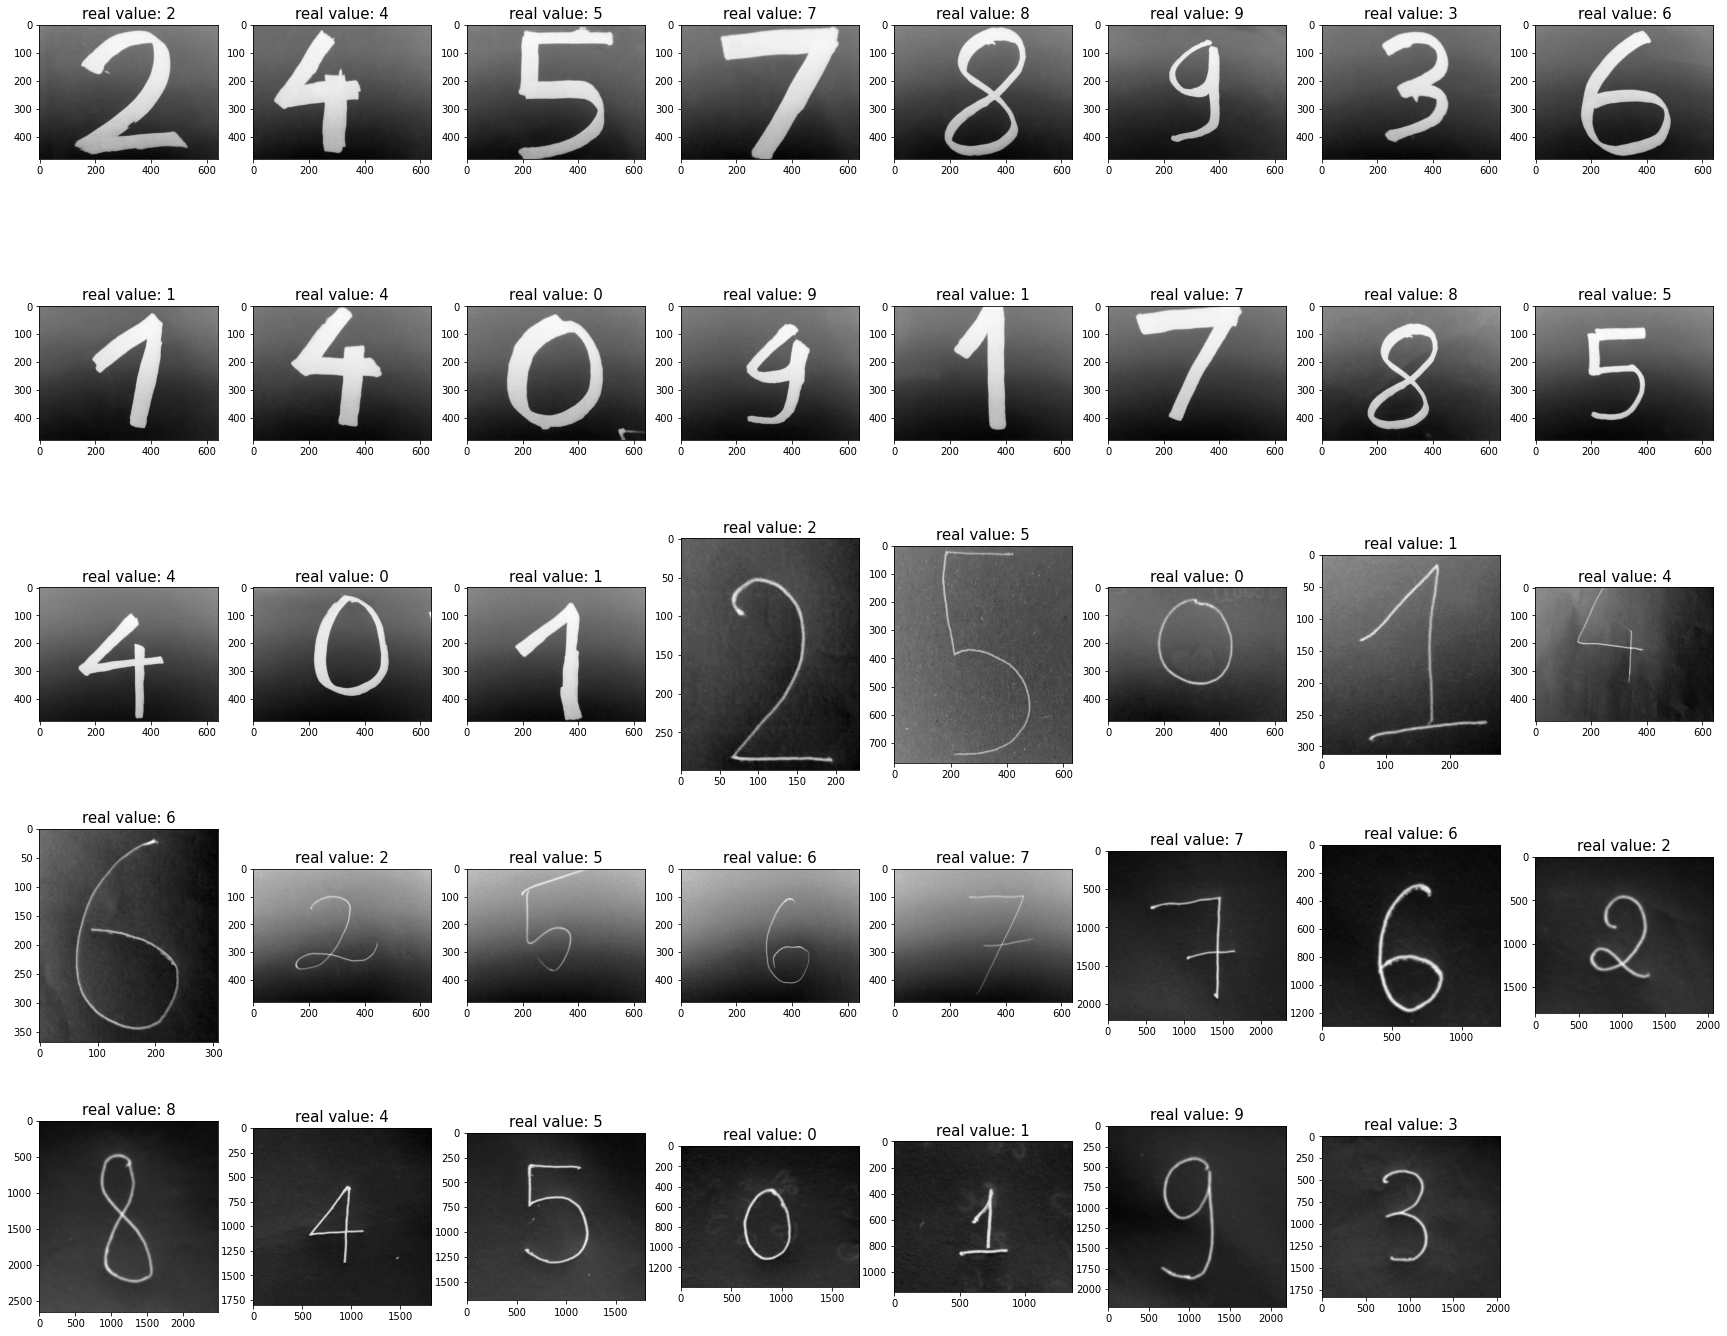

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test_temp[i]
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

Resize ảnh về ma trận 8x8

In [ ]:
for i in range(39):  
  X_test_temp[i] = cv2.resize(X_test_temp[i], (8, 8), interpolation = cv2.INTER_AREA)#resize về 8x8

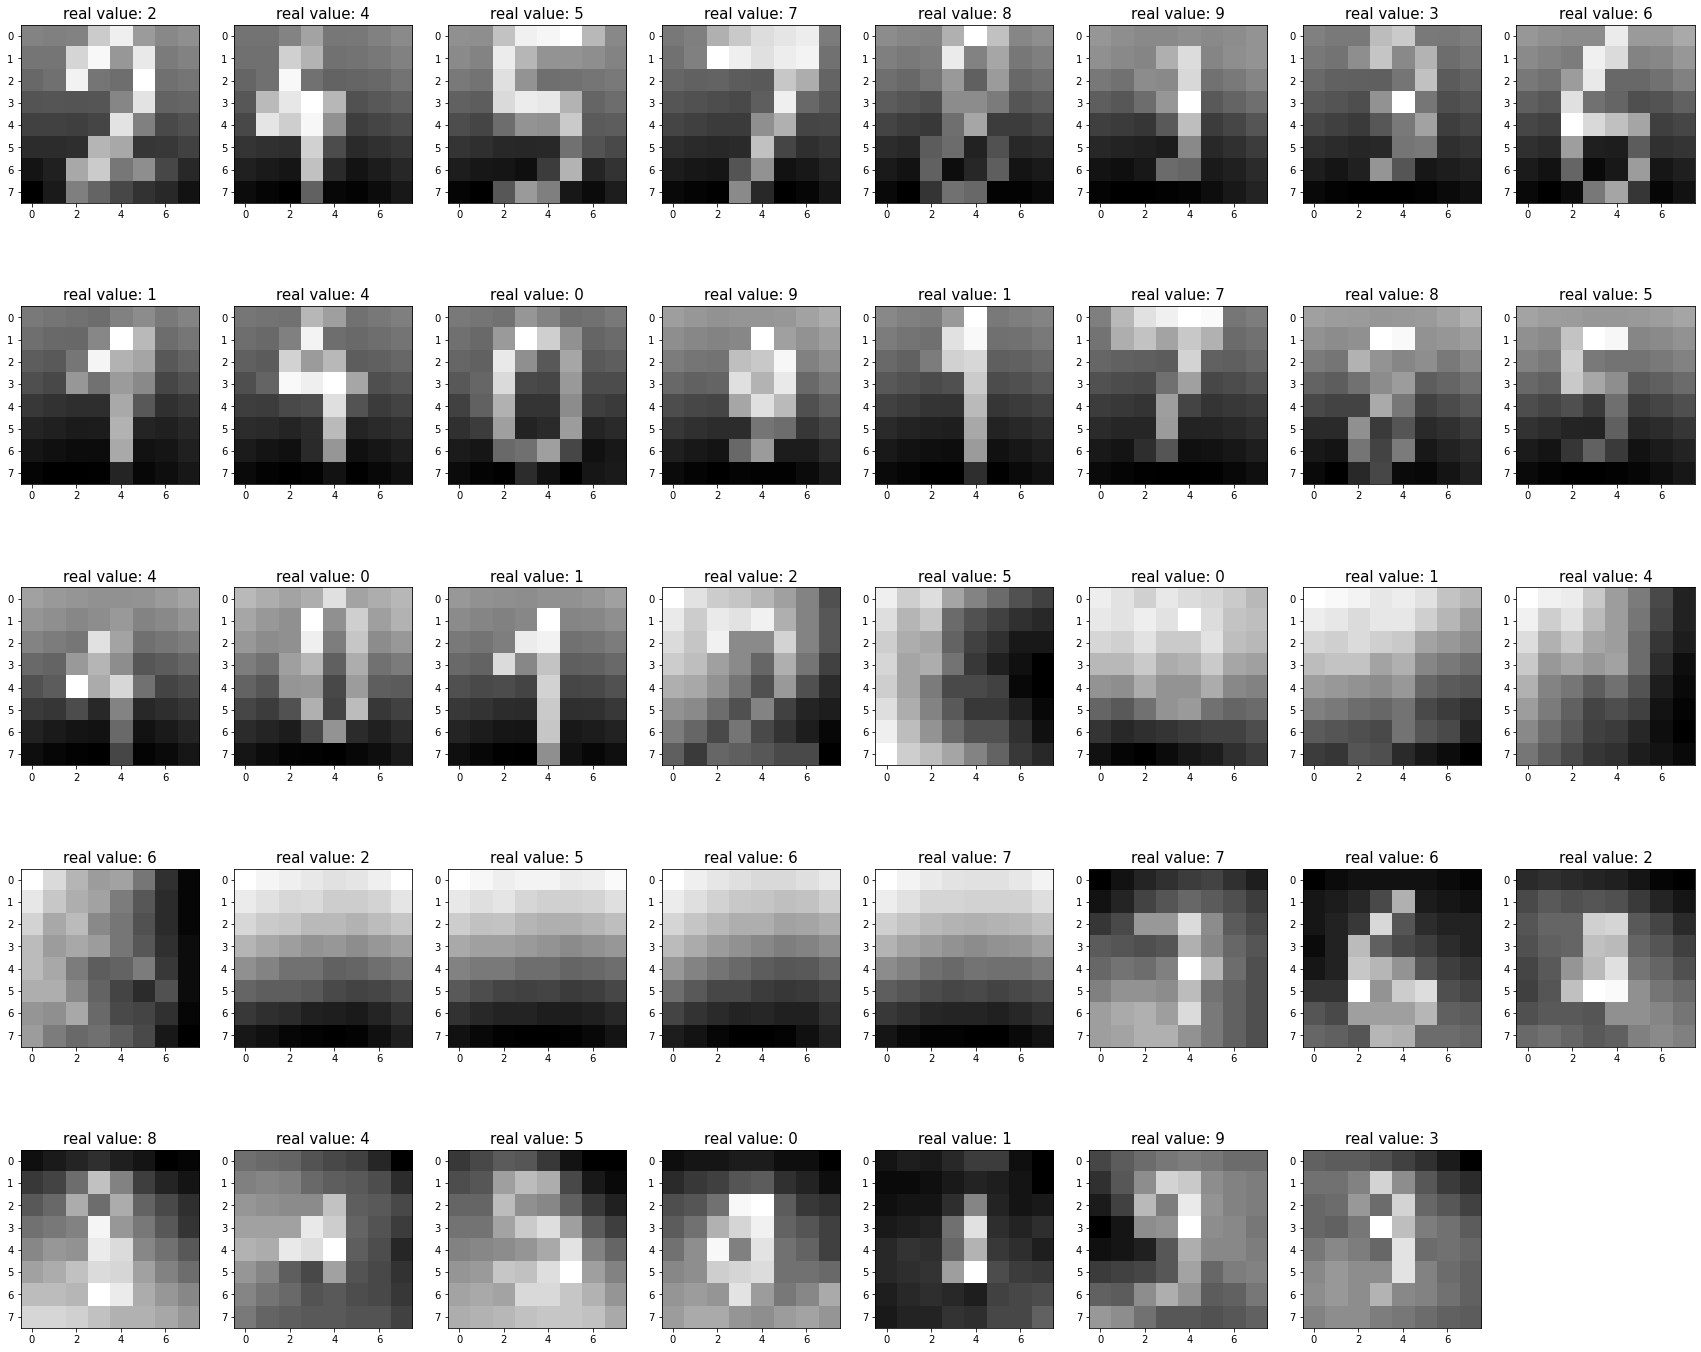

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test_temp[i]
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

Kiểm tra kích cỡ:

In [ ]:
X_test_temp[0].shape

(8, 8)

In [ ]:
X_test=[]

Reshape ma trận về dạng (64,) để có thể phù hợp với model 

In [ ]:
for i in X_test_temp:
  img_test=i.reshape(1,64)
  X_test.append(img_test)

In [ ]:
X_test[:4]

[array([[138, 136, 137, 176, 195, 150, 140, 144, 130, 130, 181, 200, 148,
         192, 133, 137, 123, 127, 197, 130, 126, 204, 127, 130, 112, 113,
         112, 113, 139, 189, 120, 122, 102, 102, 101, 104, 189, 136, 107,
         111,  91,  91,  92, 164, 157,  96,  97, 102,  78,  85, 157, 176,
         131, 143, 105,  89,  67,  81, 135, 121, 105,  94,  89,  77]],
       dtype=uint8),
 array([[136, 136, 145, 163, 138, 139, 144, 149, 134, 134, 188, 172, 135,
         136, 139, 144, 128, 134, 211, 135, 127, 128, 130, 136, 120, 176,
         201, 215, 174, 117, 121, 125, 112, 200, 187, 210, 153, 106, 110,
         114, 101,  99,  97, 189, 114,  95,  98, 102,  90,  86,  83, 180,
          95,  82,  87,  93,  78,  74,  71, 126,  75,  73,  78,  85]],
       dtype=uint8),
 array([[142, 141, 167, 190, 193, 198, 162, 138, 139, 136, 188, 161, 144,
         144, 141, 136, 130, 127, 182, 144, 125, 126, 128, 130, 118, 116,
         179, 188, 186, 160, 120, 124, 108, 104, 124, 144, 142, 171, 115,
  

Xem thử vùng giá trị của các ma trận đầu vào như thế nào?

In [ ]:
Min=0
Max=0

In [ ]:
for i in X_test:
  if np.amax(i)>Max:
    Max=np.amax(i)
  if np.amin(i)<Min:
    Min=np.amin(i)

In [ ]:
print('Min: '+str(Min)+' Max: '+str(Max))

Min: 0 Max: 229


Vùng giá trị của các ma trận đầu vào là [0->229]

Vì các ma trận training có vùng giá trị từ [0->16] như đã rút ra từ phần **'Nhận xét chung về bộ dữ liệu'**. Nên để đánh giá công bằng nhóm sẽ scale các ma trận đầu vào về với miền giá trị [0->16] như các ma trận training.

Muốn ma trận có vùng [0->229] về [0->16]. Tức k=229//16=14 ==> Nên chúng ta sẽ chia các ma trận đầu vào cho 14 để cùng vùng giá trị với các ma trận training.

In [ ]:
for i in range(len(X_test)):
  X_test[i]=(X_test[i]//14)

Check vùng giá trị sau khi scale:

In [ ]:
X_test[0:4]

[array([[ 9,  9,  9, 12, 13, 10, 10, 10,  9,  9, 12, 14, 10, 13,  9,  9,
          8,  9, 14,  9,  9, 14,  9,  9,  8,  8,  8,  8,  9, 13,  8,  8,
          7,  7,  7,  7, 13,  9,  7,  7,  6,  6,  6, 11, 11,  6,  6,  7,
          5,  6, 11, 12,  9, 10,  7,  6,  4,  5,  9,  8,  7,  6,  6,  5]],
       dtype=uint8),
 array([[ 9,  9, 10, 11,  9,  9, 10, 10,  9,  9, 13, 12,  9,  9,  9, 10,
          9,  9, 15,  9,  9,  9,  9,  9,  8, 12, 14, 15, 12,  8,  8,  8,
          8, 14, 13, 15, 10,  7,  7,  8,  7,  7,  6, 13,  8,  6,  7,  7,
          6,  6,  5, 12,  6,  5,  6,  6,  5,  5,  5,  9,  5,  5,  5,  6]],
       dtype=uint8),
 array([[10, 10, 11, 13, 13, 14, 11,  9,  9,  9, 13, 11, 10, 10, 10,  9,
          9,  9, 13, 10,  8,  9,  9,  9,  8,  8, 12, 13, 13, 11,  8,  8,
          7,  7,  8, 10, 10, 12,  8,  8,  6,  6,  6,  6,  6,  9,  7,  7,
          6,  5,  5,  5,  7, 11,  6,  6,  5,  4,  8, 10,  9,  5,  5,  6]],
       dtype=uint8),
 array([[10, 10, 12, 13, 14, 15, 15, 10, 10, 10, 16, 15

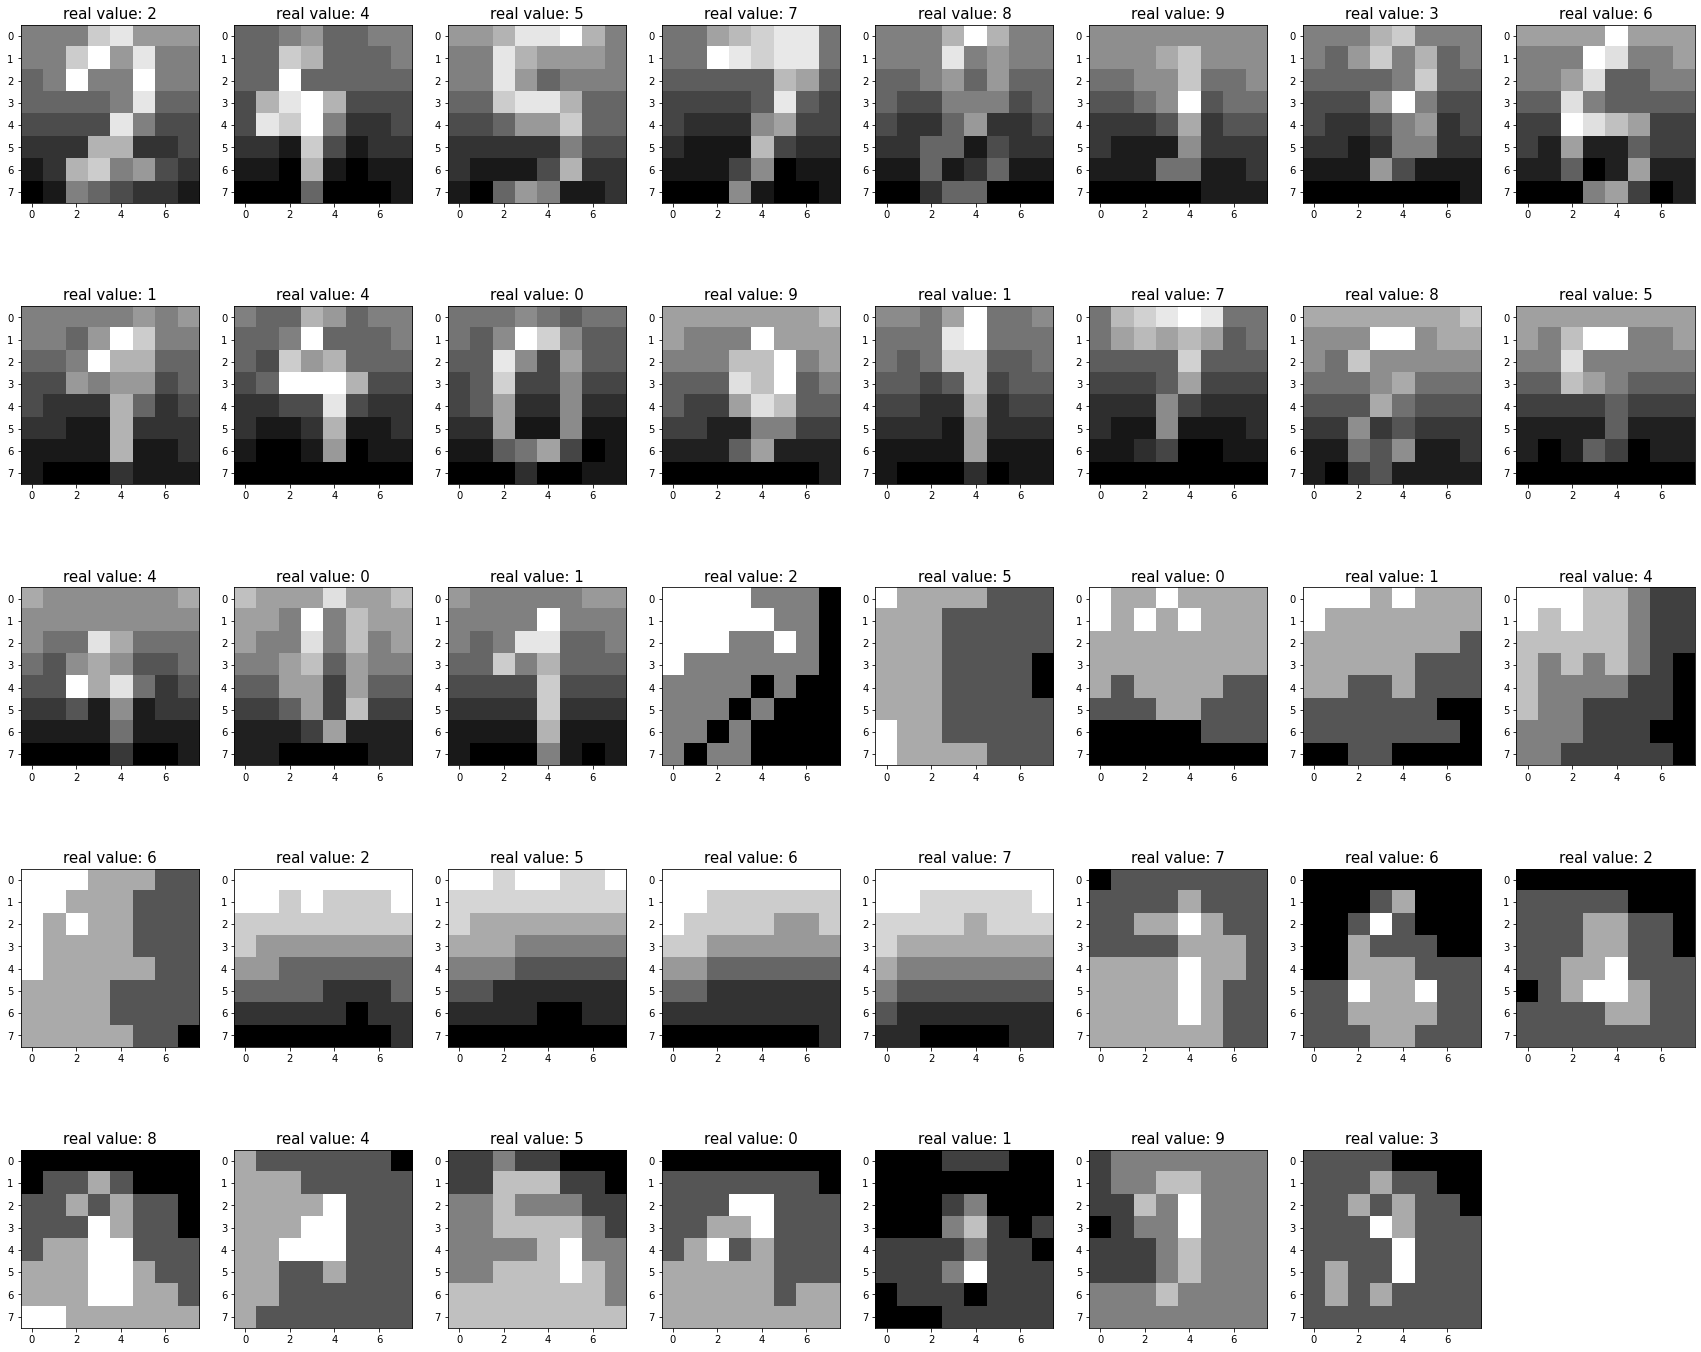

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
for i in range(39):
    imagenew=X_test[i].reshape(8,8)
    plt.subplot(rows,columns,o)
    plt.title('real value: '+str(Xlabel[i]),fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

###Tiến hành dự đoán:

In [ ]:
predicted_test=[]

In [ ]:
for i in X_test:
  temp = clf.predict(i)
  predicted_test.append(temp)

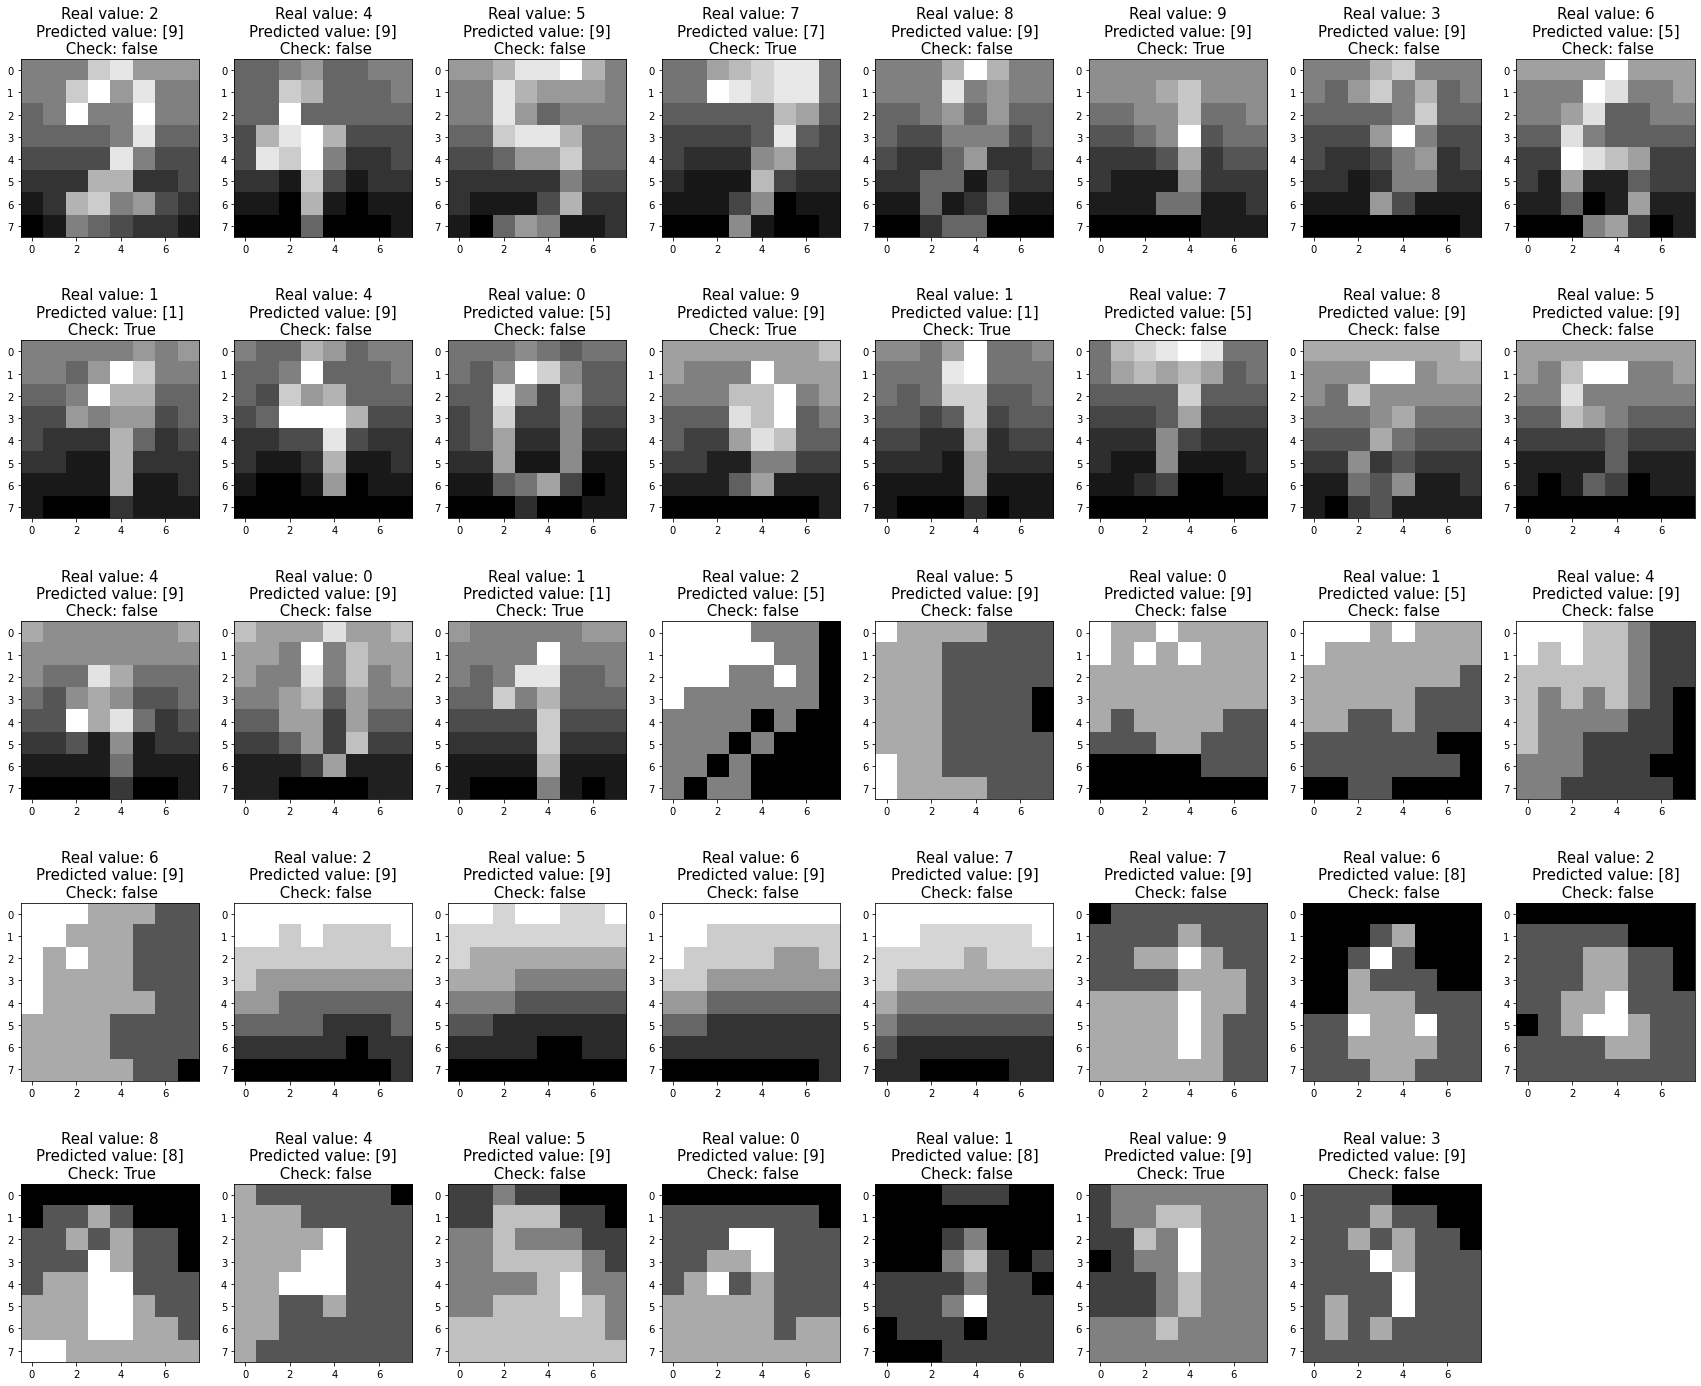

In [ ]:
fig=plt.figure(figsize=(30, 25))
columns = 8
rows = 5
o=1
count=0
for i,prediction,k in zip(range(39),predicted_test,Xlabel):
    imagenew=X_test[i].reshape(8,8)
    plt.subplot(rows,columns,o)
    temp='false'
    if prediction[0]==k:
      temp='True'
      count+=1
    plt.title(f'Real value: {k}\nPredicted value: {prediction}\n Check: {temp}',fontsize=15)
    plt.imshow(imagenew,cmap='gray')
    o+=1
plt.show()

In [ ]:
print('Kết quả : '+str(count)+'/39')

Kết quả : 8/39


Kết quả dự đoán chính xác là 8/39 ~ 20.5%

##Trả lời câu hỏi:

## Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
Kết quả chạy với webcam là **KHÔNG TỐT** (Tỷ lệ chính xác 20.5%).

## Ủa mà nhìn vào đâu để kết luận là tốt hay không?

Nhìn vào kết quả mà model dự đoán chính xác ảnh test ==> tỷ lệ chính xác dự đoán của model 8/39 ~ 20,5% ==> thấp hơn rất nhiều so với tỷ lệ mà scikit-learn đưa test: ~97%  

Kết Luận: Kết quả chạy với webcam là **KHÔNG TỐT**

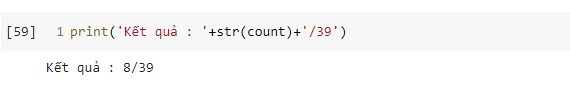

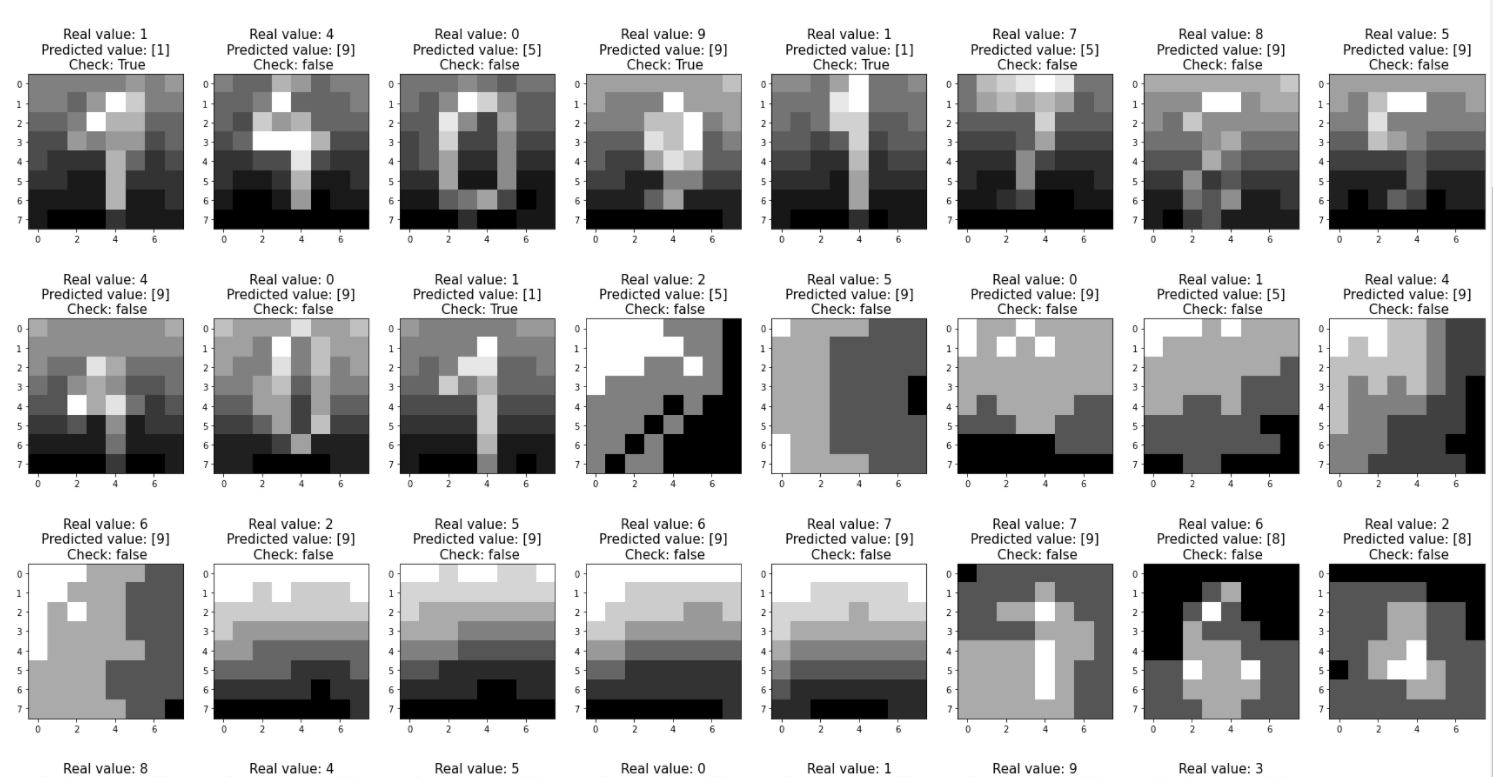

## Nếu không tốt thì lý do tại sao?


1.   Khác biệt giữa ma trận test và ma trận scikit-learn: 



Ma trận của scikit-learn:

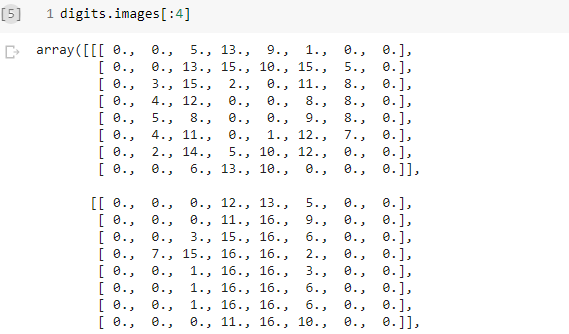

Ma trận đầu vào:

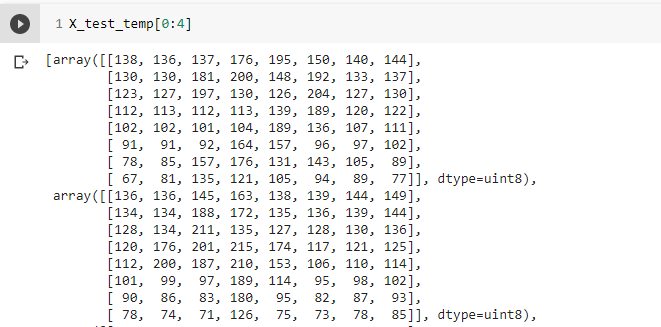

Có thể thấy ma trận dùng để test và ma trận của scikit-learn rất **khác biệt**:
*   Ma trận dùng để test có nhiều pixel nhiễu (đối với ma trận scikit-learn: vùng pixel không biểu diễn số đa số mang giá trị là 0 , đối với ma trận đầu vào dùng để test thì các pixel đều mang giá trị và không chênh lệch nhiều)

*   Khác nhau về vùng giá trị [0->16] vs [0:229] (Như đã chứng minh ở trên). Cho dù nhóm đã scale về cùng vùng giá trị là [0->16].Nhưng ảnh đầu vào khác xa với dư liệu scikit learn cung cấp !

Trước scale:



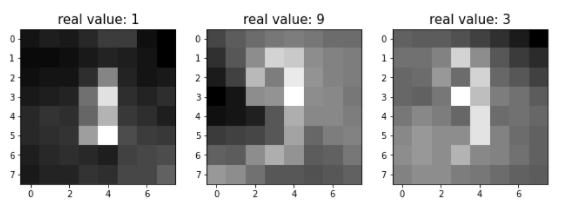

Sau scale:

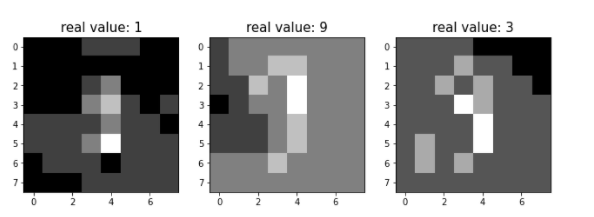

ẢNH CỦA SCIKIT-LEARN:

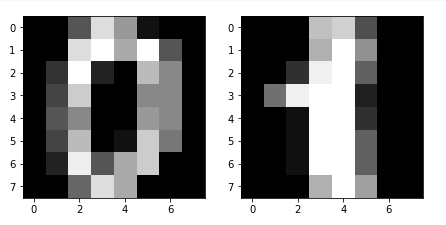

**Nhận xét:** Đối với ảnh của scikit-learn thì vùng trắng đen rất rõ ràng (chữ trắng nền đen). Còn ảnh đầu vào sau khi xử lí thì vùng trắng đen không phân tách rõ ràng không rõ ràng và nhiều nhiễu ==> dẫn đến không nhận diện được số và biên của số.

2. Kích cỡ ảnh ban đầu: Kích cỡ ảnh ban đầu của những ảnh dùng để test từ camera không phải là 8x8. Buộc phải resize về 8x8 để phù hợp cho model dự đoán. Dẫn đến nhiều chi tiết bị mất đi và kết quả không tốt.

Ví dụ với kích cỡ của ảnh đầu vào đầu tiên:

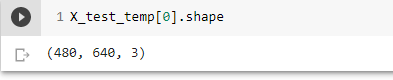

Trước khi resize:

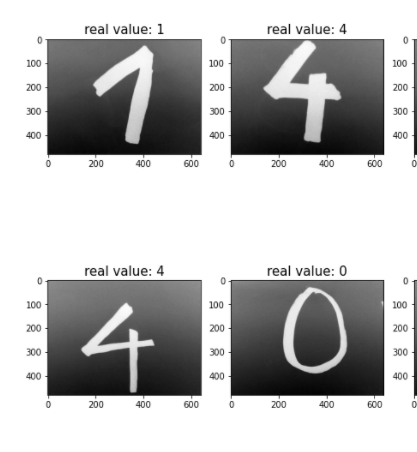

Sau khi resize:

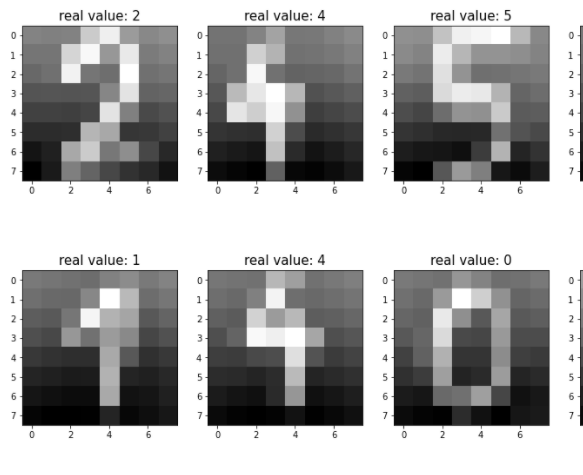

3. Ảnh đầu vào:


*   Ảnh đầu vào nhiều ảnh không đủ độ sáng (các failure case). Nên sau khi qua các bước tiền xử lí thì kết quả ảnh ra là không thể nhìn thấy được kể cả chúng ta.

Dưới đây là 1 vài tấm như vậy:




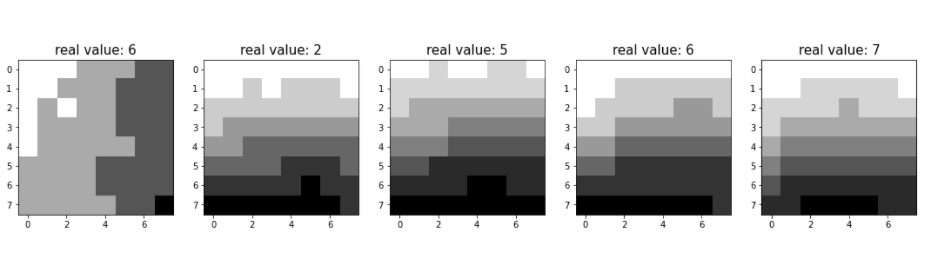

## Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

Như nhóm đã kết luận ở trên ! Thì kết quả chạy với đầu vào là ảnh từ webcam laptop là KHÔNG TỐT. Nên tất nhiên đối với bài toán nhận diện số nhà (ảnh đầu vào không chỉ có số mà còn nhiều thành phần khác(chữ, cổng nhà, vật thể lạ...) và số cần dự đoán không còn là đối tượng chính của bức ảnh ,hơn nữa nhiều yếu tố ảnh hưởng khác hơn cả ảnh được chụp từ webcam laptop ) là rất khó để nhận diện.

**Kết luận:** Không thể áp dụng model này để ứng dụng vào bài toán phức tạp hơn như nhận diện biển số nhà được!